# Facebook Recruiting IV: Human or Robot? _[Kaggle competition](https://www.kaggle.com/c/facebook-recruiting-iv-human-or-bot)_

## Is the bid made by Human or by Robot?

## About this notebook

This notebook is the second part of classification, which include fine-tuning and over-sampling. Classification models applied in this notebook are:
1. Random Forest
2. k-Nearest-Neighbors
3. Logistic Regression
4. AdaBoost
5. Anomaly Detection -- based on random forest

#### Fine-tuning and Over-sampling

Tuning models is one of the most important part in build classification models, which ensure that models could fit the specific problem better.

Over-sampling is an important way when building classifiction models on imbalanced dataset. Imbalanced dataset means that data points in different classes have extremely different proportion. For example, in our dataset, only 5% data points were labeled as '1' which represented for 'robot' while the rest 95% were labeled as '0' which indicated 'human'. Over-sampling is not the only way to treat imbalanced dataset. The reason why I choose over-sampling is the size of our dataset. For larger dataset (i.e. 100000+ data points), under-sampling would be a better choice. While for relatively small dataset (i.e. 1000+ ~ 10000+ data points), over-sampling would give us better results.

#### Features

Features are used in this project:
* avg_dev:      average number of devices are used for each bidder, per auction
* max_dev:      maximum number of devices are used for each bidder, per auction
* min_dev:      minimum number of devices are used for each bidder, per auction
* avg_num_bids: average number of bids a bidder made, per auction
* max_num_bids: maximum number of bids a bidder made, per auction
* min_num_bids: minimum number of bids a bidder made, per auction
* avg_num_cou:  average number of countries in which bidders make bids, per auction
* max_num_bids: maximum number of countries in which bidders make bids, per auction
* min_num_bids: minimum number of countries in which bidders make bids, per auction
* avg_speed:    average bidding speed for bidders, per auction
* max_speed:    maximum bidding speed for bidders, per auction
* min_speed:    minimum bidding speed for bidders, per auction
* merchandise:  the category of the auction site campaign
* country:      country codes represented by numbers
* device:       device model codes represented by numbers

#### Import necessary packages

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from scikitplot.plotters import plot_roc_curve
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import auc, roc_curve

%matplotlib inline

#### Load dataset

In [2]:
%run load_process.py

Train data


,avg_dev,avg_num_bids,avg_num_cou,avg_speed,max_dev,max_num_bids,max_num_cou,max_speed,min_dev,min_num_bids,min_num_cou,min_speed,merchandise,country,device
bidder_id,,,,,,,,,,,,,,,
91a3c57b13234af24875c56fb7e2b2f4rb56a,1.333333,1.333333,1.333333,0.008000,3,3,3,0.116564,1,1,1,0.000000,5,6,14
624f258b49e77713fc34034560f93fb3hu3jo,3.000000,3.000000,3.000000,0.000464,3,3,3,0.000464,3,3,3,0.000464,8,1,2
1c5f4fc669099bfbfac515cd26997bd12ruaj,1.000000,1.000000,1.000000,0.000000,1,1,1,0.000000,1,1,1,0.000000,9,1,2
4bee9aba2abda51bf43d639013d6efe12iycd,1.000000,1.000000,1.000000,0.000000,1,1,1,0.000000,1,1,1,0.000000,1,1,1
4ab12bc61c82ddd9c2d65e60555808acqgos1,6.739130,6.739130,6.739130,0.008155,38,38,38,0.137184,1,1,1,0.000000,8,2,53


Test data


,avg_dev,avg_num_bids,avg_num_cou,avg_speed,max_dev,max_num_bids,max_num_cou,max_speed,min_dev,min_num_bids,min_num_cou,min_speed,merchandise,country,device
bidder_id,,,,,,,,,,,,,,,
49bb5a3c944b8fc337981cc7a9ccae41u31d7,1.333333,1.333333,1.333333,0.000147,2.0,2.0,2.0,0.000440,1.0,1.0,1.0,0.0,4,3.0,2.0
a921612b85a1494456e74c09393ccb65ylp4y,1.500000,1.500000,1.500000,9.500000,2.0,2.0,2.0,19.000000,1.0,1.0,1.0,0.0,8,2.0,3.0
6b601e72a4d264dab9ace9d7b229b47479v6i,1.214286,1.214286,1.214286,0.050269,2.0,2.0,2.0,0.593750,1.0,1.0,1.0,0.0,6,3.0,4.0
eaf0ed0afc9689779417274b4791726cn5udi,1.644444,1.644444,1.644444,0.106486,15.0,15.0,15.0,3.800000,1.0,1.0,1.0,0.0,3,14.0,81.0
cdecd8d02ed8c6037e38042c7745f688mx5sf,1.150000,1.150000,1.150000,0.003218,2.0,2.0,2.0,0.062706,1.0,1.0,1.0,0.0,5,2.0,17.0


#### Defining functions

In [16]:
def tune_over_sample(model, parameters):
    tuned_model = GridSearchCV(model, parameters, cv = 5, scoring = 'roc_auc')
    tuned_model.fit(X_train, y_train)
    ot_s_model = make_pipeline(smote, tuned_model.best_estimator_)
    ot_a_model = make_pipeline(adasyn, tuned_model.best_estimator_)
    ot_r_model = make_pipeline(rdos, tuned_model.best_estimator_)
    ot_s_model.fit(X_train, y_train)
    ot_a_model.fit(X_train, y_train)
    ot_r_model.fit(X_train, y_train)

    fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (7,10))
    _ = plot_roc_curve(y_test, ot_s_model.predict_proba(X_test), ax = axes[0])
    _ = plot_roc_curve(y_test, ot_a_model.predict_proba(X_test), ax = axes[1])
    _ = plot_roc_curve(y_test, ot_r_model.predict_proba(X_test), ax = axes[2])
    axes[0].set_title('ROC Curve of SMOTE')
    axes[1].set_title('ROC Curve of ADASYN')
    axes[2].set_title('ROC Curve of RandomOverSampler')
    plt.tight_layout()
    
    return ot_s_model

def anomaly_detection(data, label, models):
    clf_isf = models
    clf_isf.fit(data, label)
    neg_isf = -clf_isf.decision_function(train)
    ones = np.ones(1985)
    pos_isf = ones - neg_isf
    y_score_isf = np.append([pos_isf], [neg_isf], axis=0).transpose()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.8,3.2))
    plot_roc_curve(label, y_score_isf, title='ROC Curve of ISF', ax=ax)
    
def submission_file(model, test_data):
        
    if model == clf_isf:
        pred_isf = model.decision_function(test_data.fillna(0))
        ones = np.ones(4700)
        pos_isf = ones - pred_isf
        pred = np.append([pos_isf], [pred_isf], axis=0).transpose()
        
    else:
        pred = model.predict_proba(test_data.fillna(0))
        
    pred_df = pd.DataFrame(pred)
    results = pd.merge(bidder_test, pred_df, left_index = True, right_index = True).rename(columns={1:'prediction'})
    results.drop(0, axis = 1, inplace=True)
    results.to_csv('submission.csv',index=False)

#### Train-test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size = 0.2, random_state=42)

#### Pre-load over-sampling methods

In [5]:
adasyn = ADASYN(random_state=42)
smote = SMOTE(random_state=42)
rdos = RandomOverSampler(random_state=42)

#### Random Forest

In [6]:
rfc = RandomForestClassifier(random_state = 42)
parameters_rfc = {'n_estimators': [5, 10, 15, 20, 30, 40], 'max_depth': [2, 5, 10, 15, 20, None], 
              'min_samples_split': [2, 5, 10, 15, 20, 30, 50, 100],
              'min_samples_leaf': [1, 2, 5, 10, 15, 20, 30], 'max_leaf_nodes':[2, 5, 10, 15, 20, 50, None]}

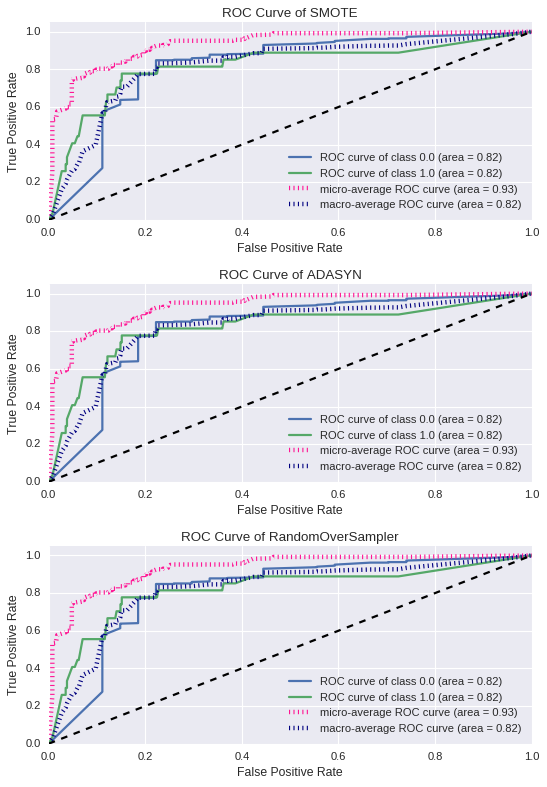

In [7]:
tuned_rfc = tune_over_sample(rfc, parameters_rfc)

#### K-Nearest-Neighbors

In [8]:
knn = KNeighborsClassifier()
parameters_knn = {'n_neighbors': range(1, 20), 'leaf_size': range(10, 50)}

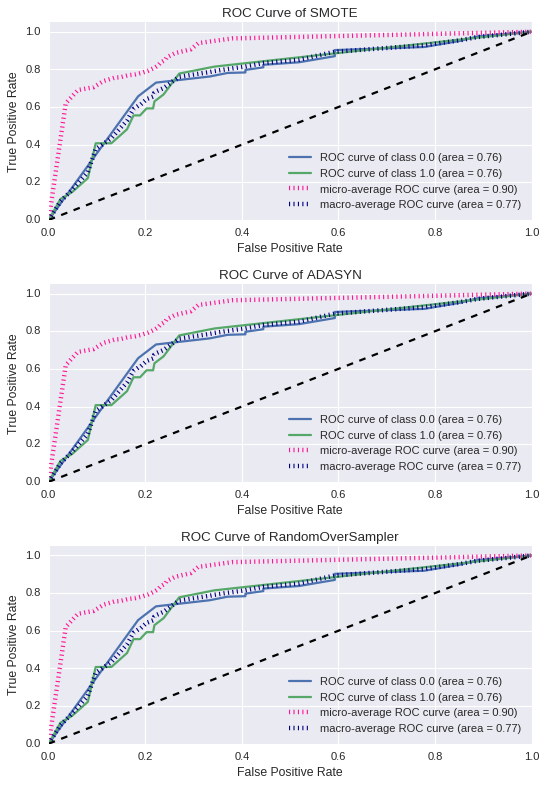

In [9]:
tuned_knn = tune_over_sample(knn, parameters_knn)

#### Logistic Regression

In [10]:
lgr = LogisticRegression(random_state=42)
parameters_lgr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

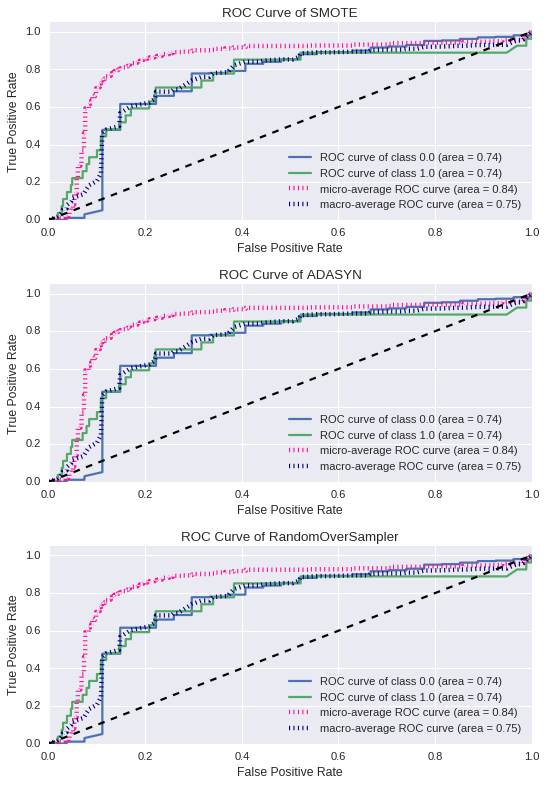

In [11]:
tuned_lgr = tune_over_sample(lgr, parameters_lgr)

#### AdaBoost

In [12]:
ada = AdaBoostClassifier(random_state=42)
parameters_ada = {'learning_rate': [1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09], 'n_estimators': range(10, 100)}

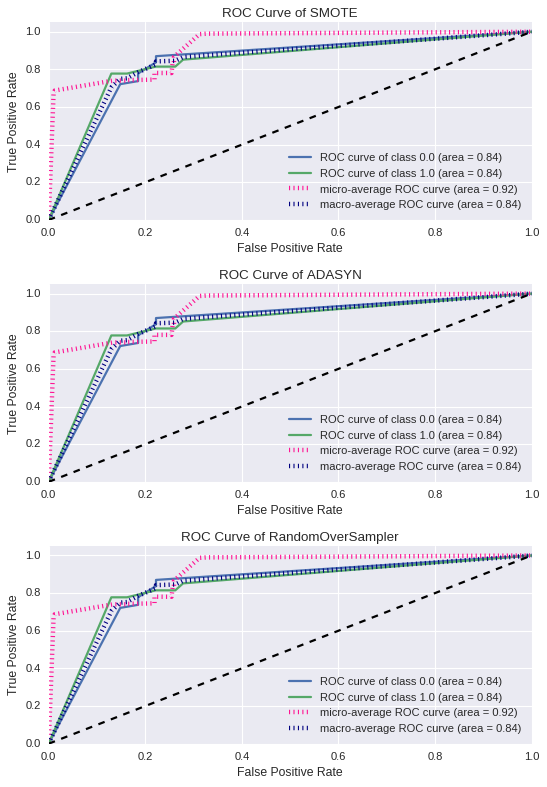

In [13]:
tuned_ada = tune_over_sample(ada, parameters_ada)

#### Anomaly Detection -- based on random forest

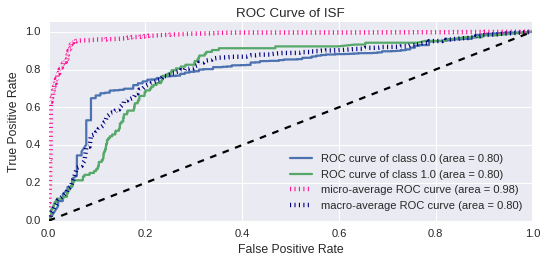

In [14]:
clf_isf = IsolationForest(random_state=42)
_ = anomaly_detection(train, labels, models=clf_isf)

#### Make prediction on test dataset and write submission file

In [17]:
submission_file(tuned_rfc, test_data)